## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [2]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [3]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("../Starter_Code/Resources/bitstamp.csv"),
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True
)



### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [4]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
print(bitstamp.head())
print(bitstamp.tail())

                         Open      High       Low      Close  BTC Volume  \
Timestamp                                                                  
2018-01-01 00:00:00  13681.04  13681.04  13637.93  $13646.48    3.334553   
2018-01-01 00:01:00  13646.48  13658.75  13610.18  $13658.75    2.663188   
2018-01-01 00:02:00  13616.93  13616.93  13610.06  $13610.22    0.084653   
2018-01-01 00:03:00  13610.27  13639.09  13610.27  $13639.09    7.182986   
2018-01-01 00:04:00  13635.35  13636.35  13620.00   $13620.0    1.069665   

                       USD Volume  Weighted Price  
Timestamp                                          
2018-01-01 00:00:00  45482.128785    13639.647479  
2018-01-01 00:01:00  36361.390888    13653.332816  
2018-01-01 00:02:00   1152.144036    13610.136247  
2018-01-01 00:03:00  97856.416478    13623.361128  
2018-01-01 00:04:00  14582.660932    13632.923329  
                        Open     High      Low     Close  BTC Volume  \
Timestamp                      

### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [5]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("../Starter_Code/Resources/coinbase.csv"),
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True
)

In [6]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
print(coinbase.head())
print(coinbase.tail())

                         Open      High       Low      Close  BTC Volume  \
Timestamp                                                                  
2018-01-01 00:00:00  13620.00  13620.00  13608.49  $13608.49   20.812754   
2018-01-01 00:01:00  13607.14  13607.14  13601.66  $13601.66   13.474359   
2018-01-01 00:02:00  13601.44  13601.44  13580.00   $13580.0   11.536360   
2018-01-01 00:03:00  13587.31  13587.31  13542.70  $13550.34   16.328039   
2018-01-01 00:04:00  13550.34  13585.95  13550.34  $13583.44    9.955364   

                       USD Volume  Weighted Price  
Timestamp                                          
2018-01-01 00:00:00  283451.08537    13619.105106  
2018-01-01 00:01:00  183283.97801    13602.426919  
2018-01-01 00:02:00  156789.19686    13590.872506  
2018-01-01 00:03:00  221413.64182    13560.332806  
2018-01-01 00:04:00  135141.26944    13574.719401  
                        Open     High      Low     Close  BTC Volume  \
Timestamp                      

## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [7]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [8]:
# Use the str.replace function to remove the dollar sign, $
bitstamp['Close'] = bitstamp['Close'].str.replace("$","")
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [9]:
# Convert the Close data type to a float
bitstamp['Close'] = bitstamp['Close'].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [10]:
# Review the data for duplicate values, and drop them if necessary
bitstamp = bitstamp.drop_duplicates()
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [11]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase = coinbase.dropna()
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [12]:
coinbase['Close'] = coinbase['Close'].str.replace("$","")
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [13]:
coinbase['Close'] = coinbase['Close'].astype("float")
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [14]:
coinbase = coinbase.drop_duplicates()
coinbase.duplicated().sum()

0

Analyze the Data
Your analysis consists of the following tasks:

Choose the columns of data on which to focus your analysis.

Get the summary statistics and plot the data.

Focus your analysis on specific dates.

Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [15]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, 'Close']

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [16]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, 'Close']

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [17]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [18]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

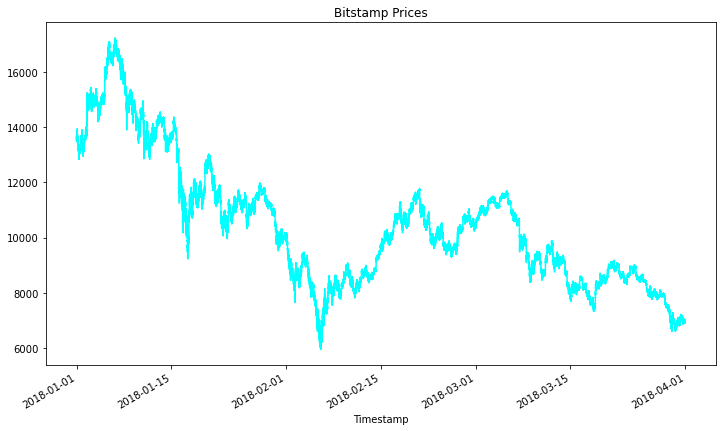

In [19]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(12,7), title="Bitstamp Prices", color="aqua")

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

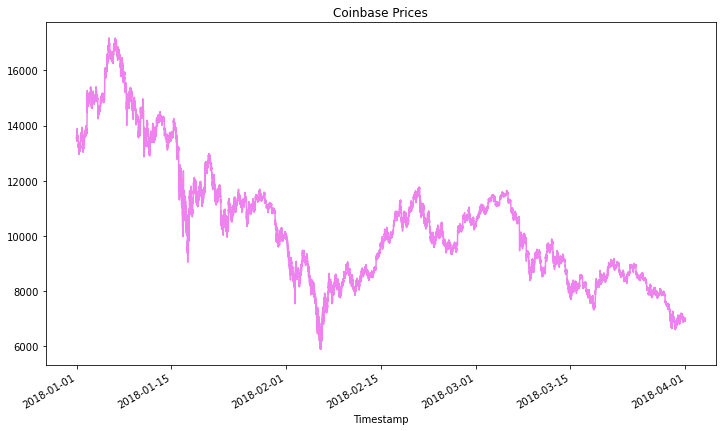

In [20]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(12,7), title="Coinbase Prices", color="violet")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase January 2018 - March 2018'}, xlabel='Timestamp'>

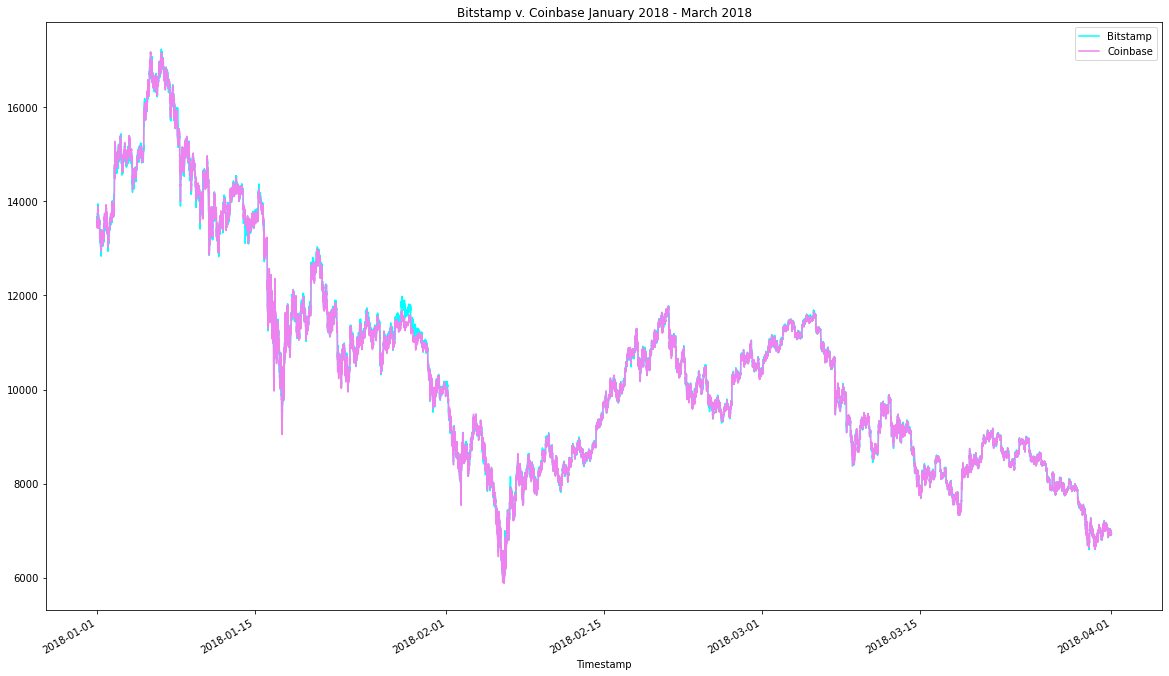

In [24]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp['Close'].plot(legend=True, figsize=(20,12), title="Bitstamp v. Coinbase January 2018 - March 2018", color="aqua", label="Bitstamp")
coinbase['Close'].plot(legend=True, figsize=(20,12), color="violet", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase January 2018 (early time period)'}, xlabel='Timestamp'>

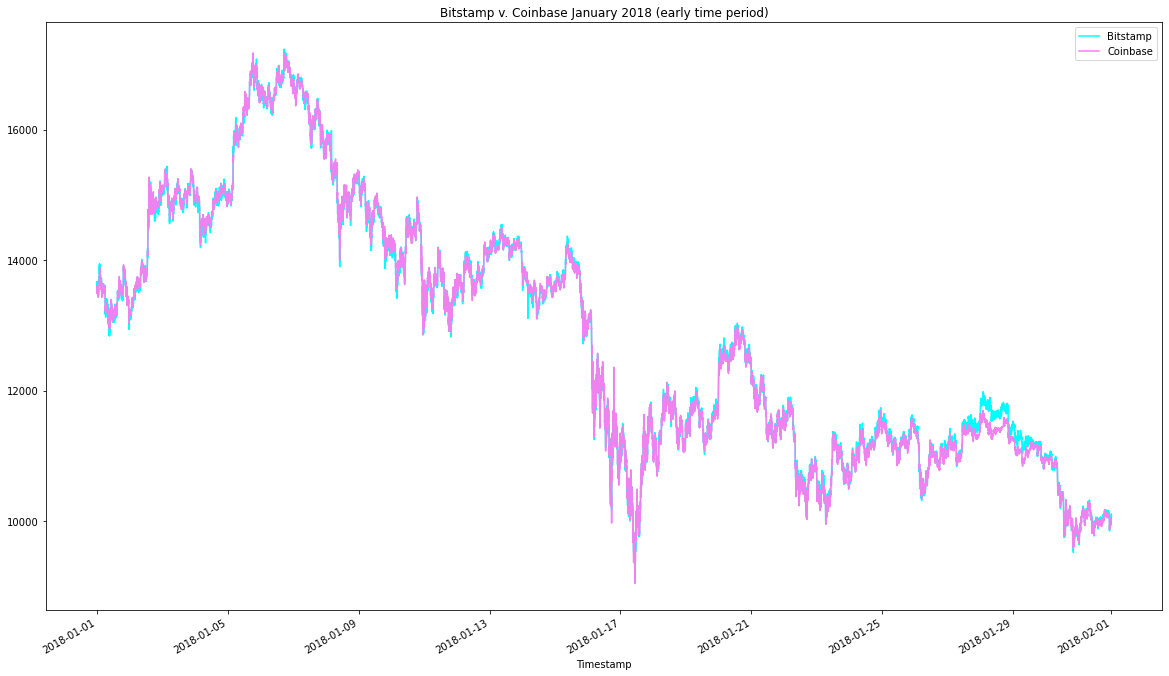

In [22]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].loc['2018-01-01' : '2018-01-31'].plot(legend=True, figsize=(20,12), title="Bitstamp v. Coinbase January 2018 (early time period)", color="aqua", label="Bitstamp")
coinbase['Close'].loc['2018-01-01' : '2018-01-31'].plot(legend=True, figsize=(20,12), color="violet", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase March 2018 (later time period)'}, xlabel='Timestamp'>

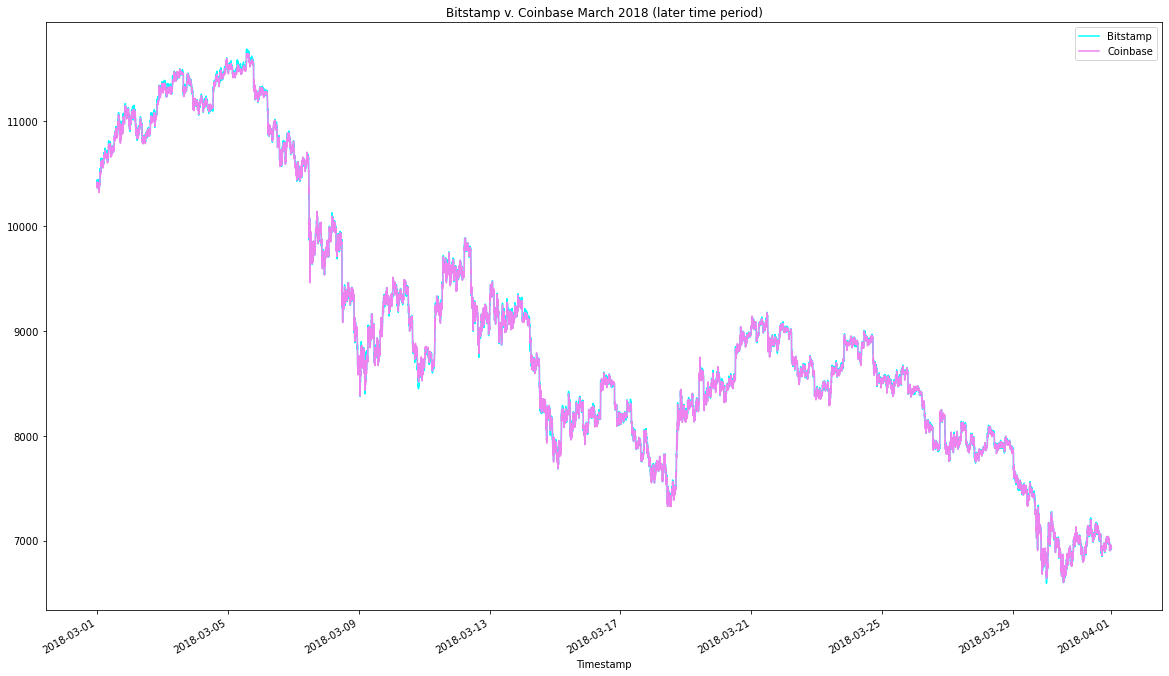

In [46]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp['Close'].loc['2018-03-01' : '2018-03-31'].plot(legend=True, figsize=(20,12), title="Bitstamp v. Coinbase March 2018 (later time period)", color="aqua", label="Bitstamp")
coinbase['Close'].loc['2018-03-01' : '2018-03-31'].plot(legend=True, figsize=(20,12), color="violet", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** As you can see from the January 2018 graph as compared to the March 2018 graph, the spread has decreased over time.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstarmp v Coinbase January 29, 2018'}, xlabel='Timestamp'>

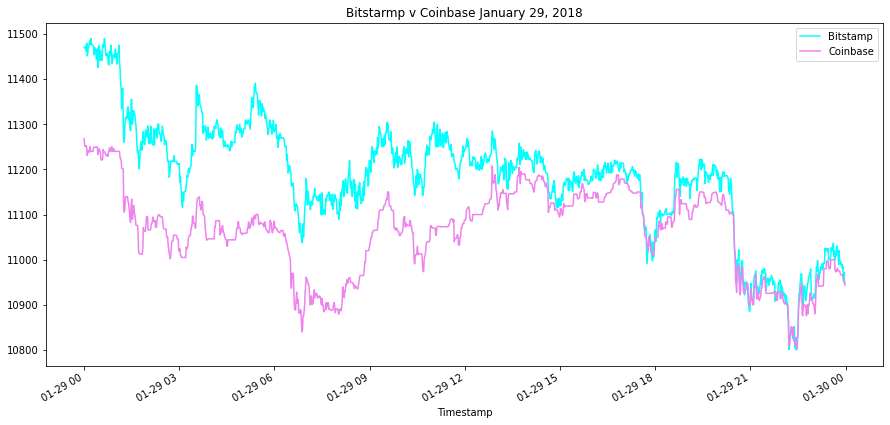

In [47]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

bitstamp_sliced_early = bitstamp['Close'].loc['2018-01-29']
coinbase_sliced_early = coinbase['Close'].loc['2018-01-29']

bitstamp_sliced_early.plot(legend=True, figsize=(15, 7), title="Bitstarmp v Coinbase January 29, 2018", color="aqua", label="Bitstamp")
coinbase_sliced_early.plot(legend=True, figsize=(15, 7), color="violet", label="Coinbase")


In [48]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced_early - bitstamp_sliced_early

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1430.000000
mean     -120.214510
std        85.164846
min      -300.270000
25%      -203.237500
50%      -132.420000
75%       -37.002500
max        48.010000
Name: Close, dtype: float64

<AxesSubplot:>

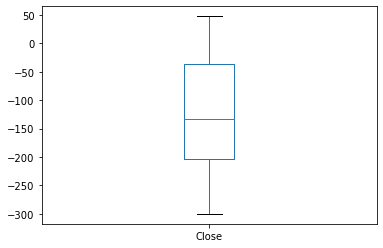

In [51]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

<AxesSubplot:title={'center':'Bitstamp v Coinbase February 10, 2018'}, xlabel='Timestamp'>

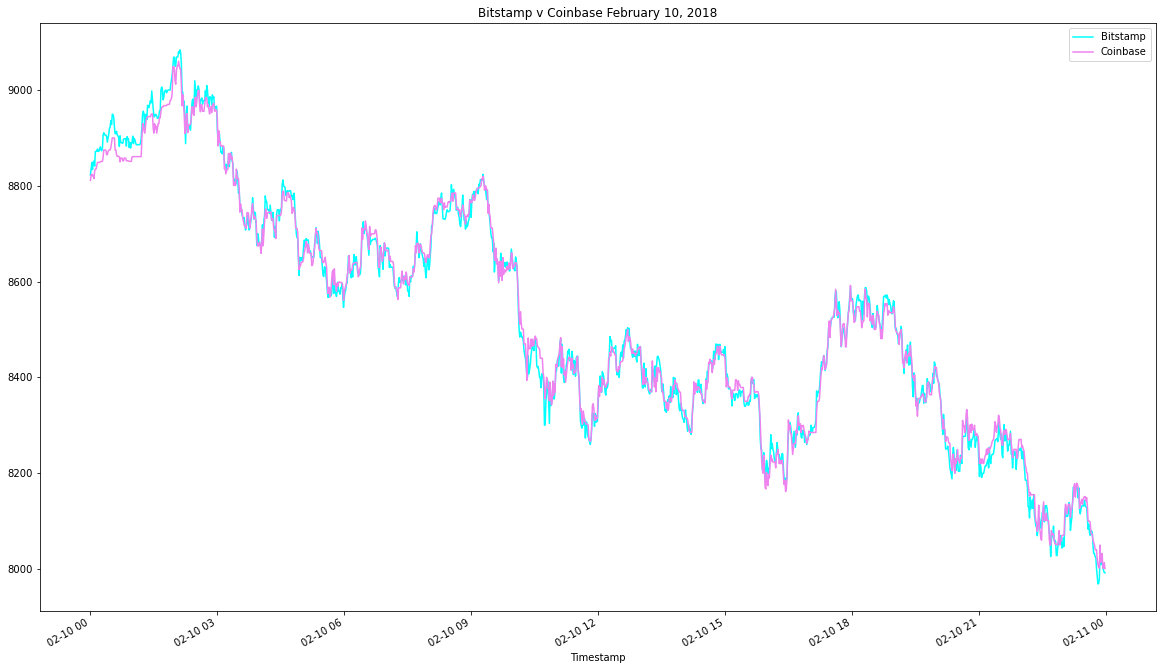

In [52]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

bitstamp_sliced_middle = bitstamp['Close'].loc['2018-02-10']
coinbase_sliced_middle = coinbase['Close'].loc['2018-02-10']

bitstamp_sliced_middle.plot(legend=True, figsize=(20,12), title="Bitstamp v Coinbase February 10, 2018", color="aqua", label="Bitstamp")
coinbase_sliced_middle.plot(legend=True, figsize=(20,12), color="violet", label="Coinbase")

In [53]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced_middle - bitstamp_sliced_middle

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1436.000000
mean       -0.364930
std        18.745766
min       -56.130000
25%       -12.657500
50%         0.010000
75%        12.180000
max        74.540000
Name: Close, dtype: float64

<AxesSubplot:>

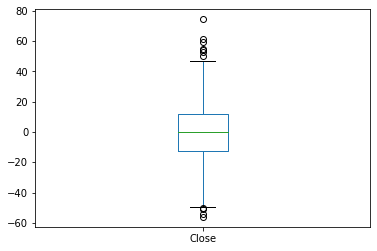

In [54]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'Bitstamp v Coinbase March 25, 2018'}, xlabel='Timestamp'>

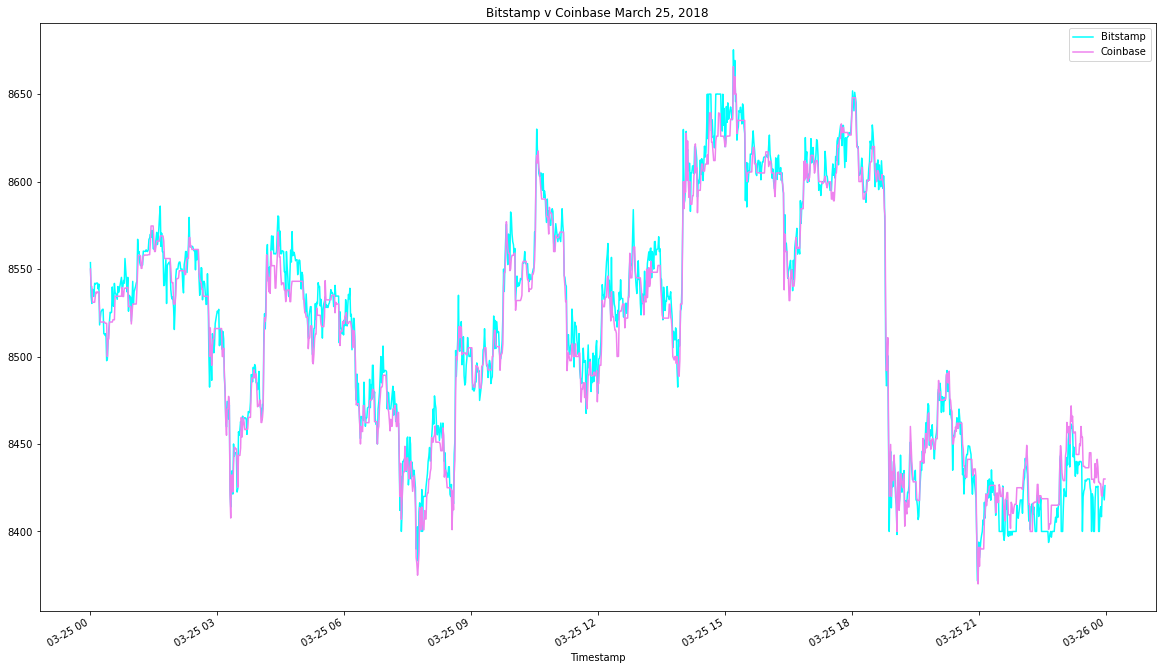

In [55]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

bitstamp_sliced_late = bitstamp['Close'].loc['2018-03-25']
coinbase_sliced_late = coinbase['Close'].loc['2018-03-25']

bitstamp_sliced_late.plot(legend=True, figsize=(20,12), title="Bitstamp v Coinbase March 25, 2018", color="aqua", label="Bitstamp")
coinbase_sliced_late.plot(legend=True, figsize=(20,12), color="violet", label="Coinbase")

In [56]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced_late - bitstamp_sliced_late

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1404.000000
mean       -2.294423
std         9.853020
min       -34.640000
25%        -8.810000
50%        -2.805000
75%         3.767500
max        53.940000
Name: Close, dtype: float64

<AxesSubplot:>

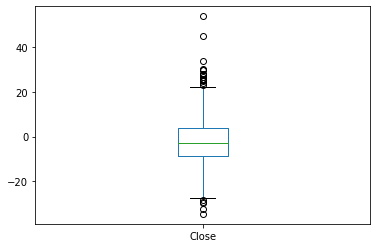

In [57]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).conditional statement

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [58]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_sliced_early - coinbase_sliced_early

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
positive_arb_spread_early = arbitrage_spread_early[arbitrage_spread_early > 0]
positive_arb_spread_early.describe()



count    1379.000000
mean      124.976425
std        82.959829
min         0.570000
25%        41.885000
50%       144.380000
75%       204.135000
max       300.270000
Name: Close, dtype: float64

In [59]:
arbitrage_spread_middle = bitstamp_sliced_middle - coinbase_sliced_middle

positive_arb_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]
positive_arb_spread_middle.describe()

count    707.000000
mean      15.588911
std       11.599399
min        0.010000
25%        5.515000
50%       13.160000
75%       22.880000
max       56.130000
Name: Close, dtype: float64

In [60]:
arbitrage_spread_late = bitstamp_sliced_late - coinbase_sliced_late

positive_arb_spread_late = arbitrage_spread_late[arbitrage_spread_late > 0]
positive_arb_spread_late.describe()

count    862.000000
mean       8.345858
std        5.854515
min        0.030000
25%        3.857500
50%        7.325000
75%       11.870000
max       34.640000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [61]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = positive_arb_spread_early / coinbase_sliced_early

# Review the spread return DataFrame
spread_return_early.head()

Timestamp
2018-01-29 00:00:00    0.017925
2018-01-29 00:01:00    0.019284
2018-01-29 00:02:00    0.019307
2018-01-29 00:03:00    0.019840
2018-01-29 00:04:00    0.018541
Name: Close, dtype: float64

In [62]:
spread_return_middle = positive_arb_spread_middle / coinbase_sliced_middle
spread_return_middle.head()

Timestamp
2018-02-10 00:00:00    0.001265
2018-02-10 00:01:00    0.001428
2018-02-10 00:02:00    0.002776
2018-02-10 00:03:00    0.001473
2018-02-10 00:04:00    0.003100
Name: Close, dtype: float64

In [63]:
spread_return_late = positive_arb_spread_late / coinbase_sliced_late
spread_return_late.head()

Timestamp
2018-03-25 00:00:00    0.000429
2018-03-25 00:01:00         NaN
2018-03-25 00:02:00         NaN
2018-03-25 00:03:00    0.000880
2018-03-25 00:04:00    0.000394
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [64]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-29 00:00:00    0.017925
2018-01-29 00:01:00    0.019284
2018-01-29 00:02:00    0.019307
2018-01-29 00:03:00    0.019840
2018-01-29 00:04:00    0.018541
Name: Close, dtype: float64

In [65]:
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [66]:
profitable_trades_late = spread_return_late[spread_return_late > .01]
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [67]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or your trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    742.000000
mean       0.017795
std        0.003142
min        0.010021
25%        0.015371
50%        0.018233
75%        0.020063
max        0.027075
Name: Close, dtype: float64

In [68]:
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [69]:
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [70]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced_early

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2018-01-29 00:00:00    205.600508
2018-01-29 00:01:00    221.184577
2018-01-29 00:02:00    221.413893
2018-01-29 00:03:00    227.648779
2018-01-29 00:04:00    212.508363
Name: Close, dtype: float64

In [71]:
profit_middle = profitable_trades_middle * bitstamp_sliced_middle
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_middle.head()

Series([], Name: Close, dtype: float64)

In [72]:
profit_late = profitable_trades_late * bitstamp_sliced_late
profit_per_trade_late = profit_late.dropna()
profit_per_trade_late.head()

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [73]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    742.000000
mean     200.333292
std       35.816052
min      112.323620
25%      172.656840
50%      204.567757
75%      225.427580
max      308.399667
Name: Close, dtype: float64

In [74]:
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [75]:
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - January 29, 2018'}, xlabel='Timestamp'>

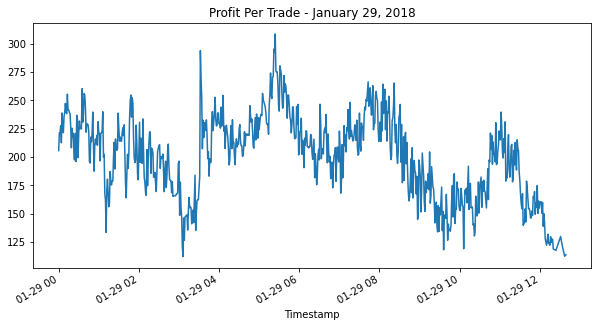

In [76]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10,5), title="Profit Per Trade - January 29, 2018")

<AxesSubplot:title={'center':'Profit Per Trade - February 10, 2018'}, xlabel='Timestamp'>

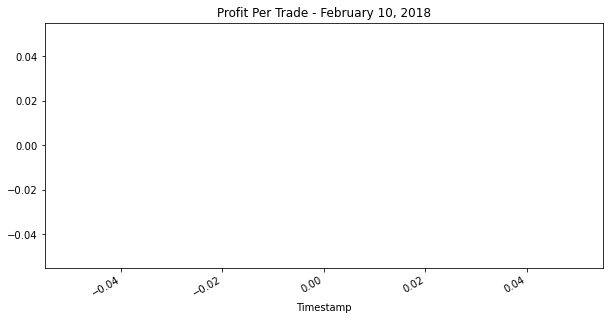

In [77]:
profit_per_trade_middle.plot(figsize=(10,5), title="Profit Per Trade - February 10, 2018")

<AxesSubplot:title={'center':'Profit Per Trade - March 25, 2018'}, xlabel='Timestamp'>

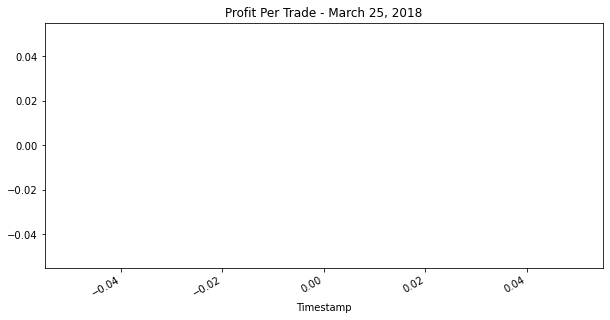

In [78]:
profit_per_trade_late.plot(figsize=(10,5), title="Profit Per Trade - March 25, 2018")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [84]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

148647.30257393542

In [85]:
profit_per_trade_middle.sum()

0.0

In [86]:
profit_per_trade_late.sum()

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [87]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - January 29, 2018'}, xlabel='Timestamp'>

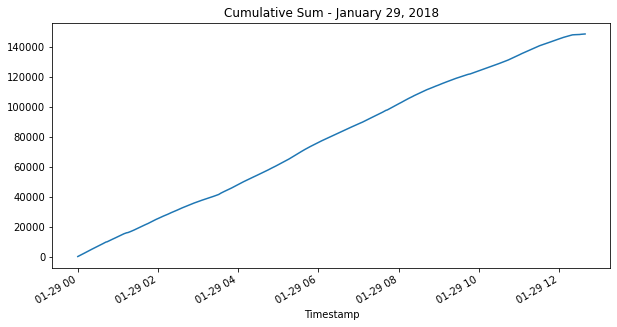

In [88]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10,5), title="Cumulative Sum - January 29, 2018")

<AxesSubplot:title={'center':'Cumulative Sum - February 10, 2018'}, xlabel='Timestamp'>

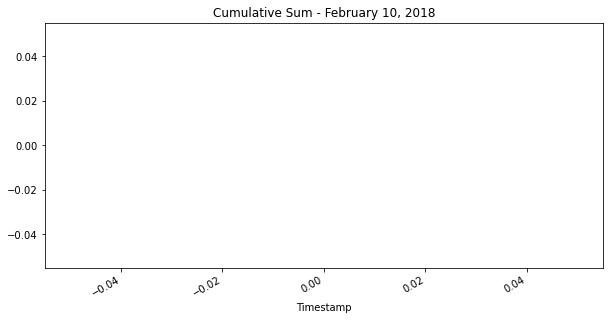

In [89]:
cumulative_profit_middle.plot(figsize=(10,5), title="Cumulative Sum - February 10, 2018")

<AxesSubplot:title={'center':'Cumulative Sum - March 25, 2018'}, xlabel='Timestamp'>

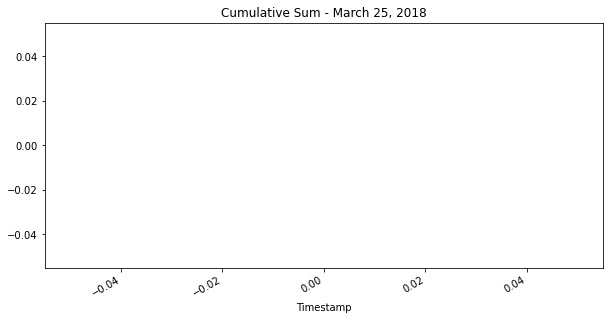

In [90]:
cumulative_profit_late.plot(figsize=(10,5), title="Cumulative Sum - March 25, 2018")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** In looking at the Bitcoin trades on Bitstamp and Coinbase, the largest differential was earlier in the timeframe.  As the analysis shows, the end of January (January 29th is depicted in the graph above), the opportunity to buy Coinbase and sell Bitstamp was the most profitable.  As time goes forward through March, the trades are not profitable possibly due to the number of trades and/or the popularity.